In [1]:
from sklearn import tree
import os
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.datasets import load_iris
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin' 

# iris 실습데이터 로드
df=pd.read_csv("C://Users//yoona//Desktop//fetal_health.csv")
print(df.shape)

(2126, 22)


In [2]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [4]:
import graphviz
clf3 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
clf3.fit(df.iloc[:,:-1], df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

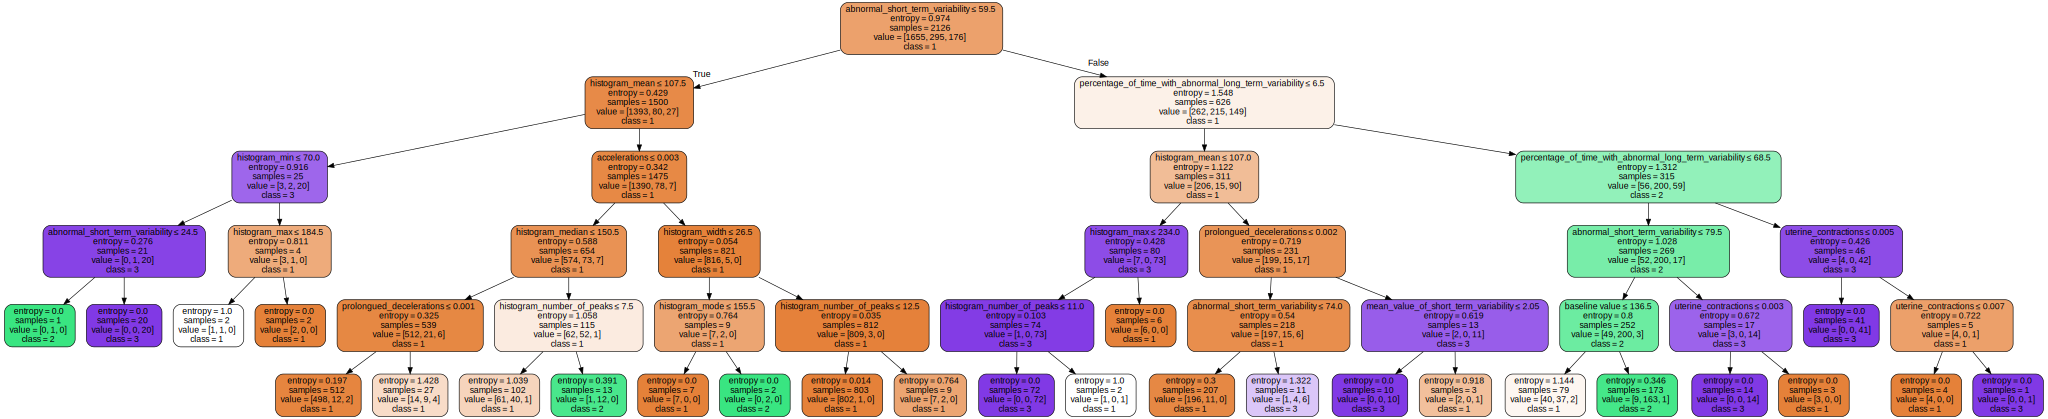

In [5]:
feature_names = ['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency']
class_names = np.array(['1','2','3'], dtype='<U10')       # 최종 분류 모델이 1또는 2또는 3임
dot_data3 = tree.export_graphviz(clf3,               # 의사나무 모형 대입
                               out_file = None,        # file로 변환할 것인가
                               feature_names = feature_names,
                               class_names = class_names,
                               filled = True,          # 그림에 색상을 넣을것인가
                               rounded = True,         # 반올림을 진행할 것인가
                               special_characters = True)  # 특수문자를 사용하나

graph3 = graphviz.Source(dot_data3)              
graph3

[0.03277891 0.04784849 0.         0.01977774 0.         0.
 0.04835623 0.3625348  0.00337562 0.20653505 0.         0.00544793
 0.008831   0.01774665 0.01711781 0.         0.00438298 0.16923202
 0.05603478 0.         0.        ]


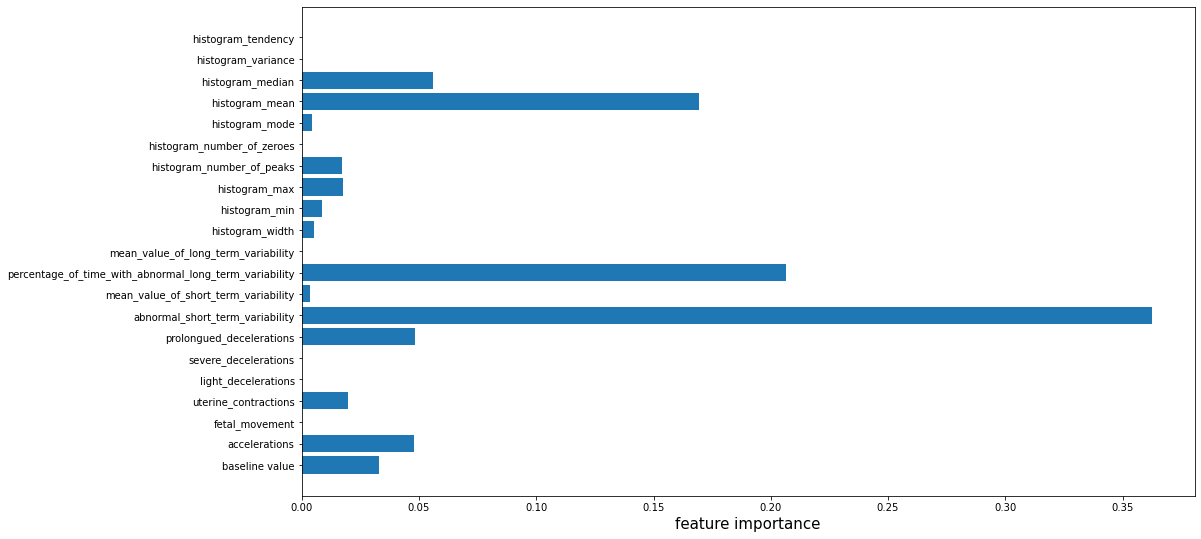

In [6]:
print(clf3.feature_importances_)
# 피쳐별 중요도 출력

n_feature = 21    # 피쳐 갯수
idx = np.arange(n_feature)

plt.figure(figsize=(16, 9))
plt.barh(idx, clf3.feature_importances_, align='center')
plt.yticks(idx, feature_names)
plt.xlabel('feature importance', size=15)
plt.show()

In [7]:
# Confusion matrix를 활용해서 세 모델의 정확도 비교

from sklearn.metrics import confusion_matrix

# 1번 의사결정나무 - 지니계수 활용
confusion_matrix(df.iloc[:,-1], clf3.predict(df.iloc[:,:-1]))

array([[1644,   10,    1],
       [ 113,  178,    4],
       [  11,    1,  164]], dtype=int64)

In [8]:
from sklearn.utils.multiclass import unique_labels
unique_labels(df.iloc[:,-1], clf3.predict(df.iloc[:,:-1]))

array([1, 2, 3], dtype=int64)

In [9]:
print(df.iloc[:,-1])

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: fetal_health, Length: 2126, dtype: int64


In [10]:
# 맨 끝에 -1 하는 이유는 실제 target이 1,2,3 인데 index로 들어가려면 0,1,2가 되야 하기 때문에 하나 빼준다
unique_labels(df.iloc[:,-1], clf3.predict(df.iloc[:,:-1]))-1

array([0, 1, 2], dtype=int64)

In [11]:

class_names[unique_labels(df.iloc[:,-1], clf3.predict(df.iloc[:,:-1]))-1]

array(['1', '2', '3'], dtype='<U10')

Confusion matrix, without normalization
[[1644   10    1]
 [ 113  178    4]
 [  11    1  164]]
Normalized confusion matrix
[[9.93e-01 6.04e-03 6.04e-04]
 [3.83e-01 6.03e-01 1.36e-02]
 [6.25e-02 5.68e-03 9.32e-01]]


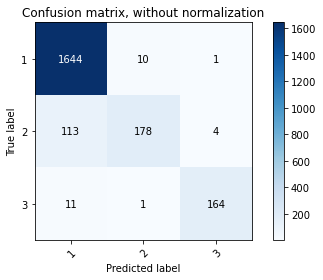

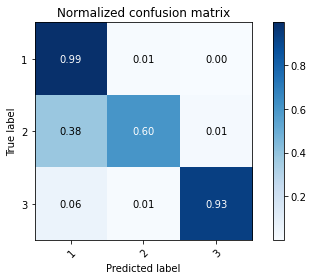

In [12]:
from sklearn.utils.multiclass import unique_labels
# Confusion Matrix 시각화
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)-1]        # 원래는 없던 건데 -1 해준다
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# 정규화 안한 confusion matrix
plot_confusion_matrix(df.iloc[:,-1], clf3.predict(df.iloc[:,:-1]), classes=class_names, title='Confusion matrix, without normalization')

# 정규화 한 confusion matrix
plot_confusion_matrix(df.iloc[:,-1], clf3.predict(df.iloc[:,:-1]), classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

Confusion matrix, without normalization
[[392  18   4]
 [ 23  50   1]
 [  1   0  43]]
Normalized confusion matrix
[[0.95 0.04 0.01]
 [0.31 0.68 0.01]
 [0.02 0.   0.98]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

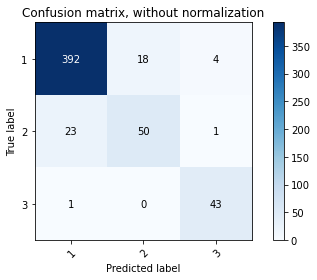

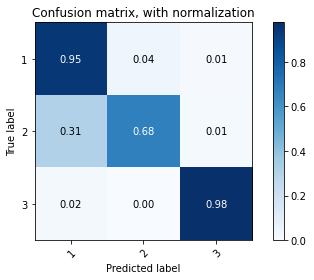

In [13]:
# 위에는 학습한 애로 그대로 정확도를 측정했지만, Test를 나눠보자

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1]             #feature 
                                                    , df.iloc[:,-1]              #target
                                                    , stratify = df.iloc[:,-1]     #층화추출법
                                                    , random_state = 1)          #난수고정

# 트레인만 가지고
clf4 = tree.DecisionTreeClassifier(criterion = "entropy")
clf4.fit(X_train, y_train)

# 트레인 가지고 훈련한 모델에 테스트 넣고 confusion matrix
plot_confusion_matrix(y_test, clf4.predict(X_test), classes=class_names, title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test, clf4.predict(X_test), classes=class_names, normalize=True, title='Confusion matrix, with normalization')

In [14]:
print("훈련 정확도 : {:.5f}".format(clf4.score(X_train, y_train)))
print("테스트 정확도 : {:.5f}".format(clf4.score(X_test, y_test)))

훈련 정확도 : 0.99875
테스트 정확도 : 0.91165


In [15]:
# max_depth = 1 일때 테스트 정확도 : 0.91729
# max_depth = 2 일때 테스트 정확도 : 0.91353
# max_depth = 3 일때 테스트 정확도 : 0.91541
# max_depth = 4 일때 테스트 정확도 : 0.91917
# max_depth = 5 일때 테스트 정확도 : 0.91165